In [13]:
# import required packages
import geopandas as gpd
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
!pip install mapclassify
import matplotlib.pyplot as plt

In [14]:
# import the required machine learning packages
from sklearn import cluster
from sklearn.preprocessing import scale

# set seaborn plotting theme to white
sns.set_theme(style="white")

In [15]:
# Read in the LSOA shp file for Leeds
leeds_shp =gpd.read_file('Leeds.geojson')
leeds_shp.head()

,FID,LSOA21CD,LSOA21NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,10720,E01011264,Leeds 011A,420937,441836,-1.68306,53.87232,14a73329-fc8f-464c-a4fa-1963baa35500,"POLYGON ((421248.688 442315.812, 421284.073 44..."
1,10721,E01011265,Leeds 009A,418988,441951,-1.71269,53.87343,eda471dd-f408-4dab-917e-c5e188310b35,"POLYGON ((418635.000 442559.000, 418637.555 44..."
2,10722,E01011266,Leeds 008A,417489,442615,-1.73545,53.87945,286c32c5-ef49-4ecc-a45e-57630c165c62,"POLYGON ((417783.688 443382.312, 417788.688 44..."
3,10723,E01011267,Leeds 009B,419641,442025,-1.70276,53.87407,318cfaa3-9f08-4d61-a30e-82e903f3a7ba,"POLYGON ((419607.843 442388.568, 419612.752 44..."
4,10724,E01011268,Leeds 010A,420224,441935,-1.69390,53.87324,049e79f0-cd9e-47dc-848b-b6d6fa6825ac,"POLYGON ((420442.406 442436.687, 420443.313 44..."


In [16]:
# # Data downloaded from https://geoportal.statistics.gov.uk/maps/761ecd09b4124843b95511a242e2b1a1
shp = gpd.read_file('Lower_layer_Super_Output_Areas_2021_EW_BFE_V9_-3647710721716634062.geojson')
leeds_shp =shp.loc[shp['LSOA21NM'].str.contains('Leeds'),:]
leeds_shp.to_file('Leeds.geojson')

In [17]:
# Data-preprocessing
# Import data
# Read in csv data using pandas
age = pd.read_csv('age.csv')
crime = pd.read_csv('crime_10_2021.csv')

# Look at the colums in the data
age.columns
crime.columns

# Check for missing data
age.isnull().sum()
crime.isnull().sum()

LSOA code                  0
LSOA name                  0
Crime type                 0
Last outcome category    601
number of offences         0
dtype: int64

In [18]:
# Calculate the total number of offences in each area of Leeds. And write the
# results into a new data frame to facilitate subsequent analysis of the number
# of crimes in each area of Leeds.
grouped_crime = crime.groupby('LSOA code')['number of offences'].sum().reset_index()
print(grouped_crime)
crime_region = pd.DataFrame(grouped_crime)

# Link the age dataframe and the crime_region dataframe together to allow the
# subsequent analysis of the relationship between the proportion of the youth
# population in Leeds and the crime rate.
age_crime  = pd.merge(age, crime_region,  left_on='LSOA 2021 Code', right_on='LSOA code', how='left')
age_crime.head()

     LSOA code  number of offences
0    E01011264                   6
1    E01011265                  20
2    E01011266                   6
3    E01011267                  20
4    E01011268                  11
..         ...                 ...
473  E01033031                  41
474  E01033032                  28
475  E01033033                   8
476  E01033034                  18
477  E01033035                  38

[478 rows x 2 columns]


,LAD 2021 Code,LAD 2021 Name,LSOA 2021 Code,LSOA 2021 Name,Total,F0 to 15,F16 to 29,F30 to 44,F45 to 64,F65 and over,M0 to 15,M16 to 29,M30 to 44,M45 to 64,M65 and over,youngs,proportion of youth population,LSOA code,number of offences
0,E08000035,Leeds,E01011264,Leeds 011A,"1,296",83,70,120,209,192,91,84,95,181,171,328,25.31,E01011264,6.0
1,E08000035,Leeds,E01011265,Leeds 009A,"1,967",168,150,227,232,263,186,134,221,227,159,638,32.44,E01011265,20.0
2,E08000035,Leeds,E01011266,Leeds 008A,"2,652",222,167,281,362,244,289,177,292,409,209,855,32.24,E01011266,6.0
3,E08000035,Leeds,E01011267,Leeds 009B,"1,696",146,119,193,214,230,173,133,135,195,158,571,33.67,E01011267,20.0
4,E08000035,Leeds,E01011268,Leeds 010A,"1,416",155,104,155,195,128,142,103,125,207,102,504,35.59,E01011268,11.0


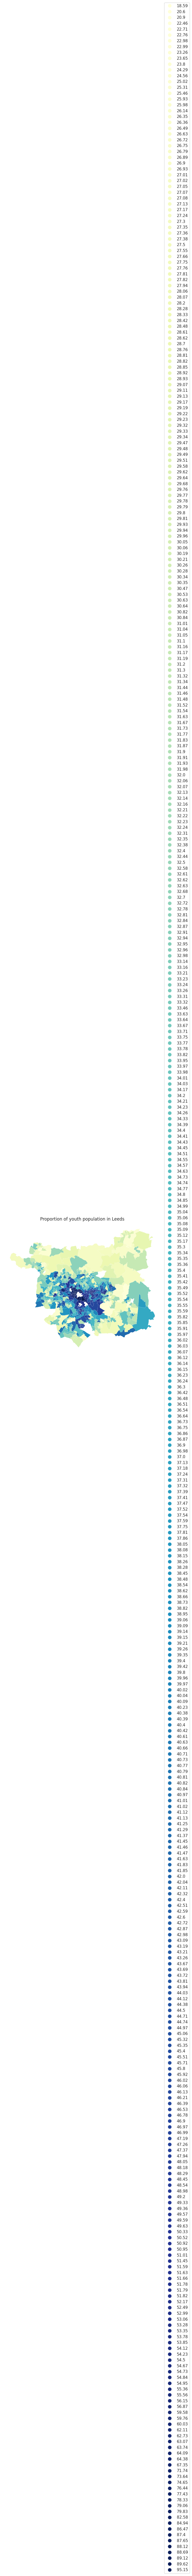

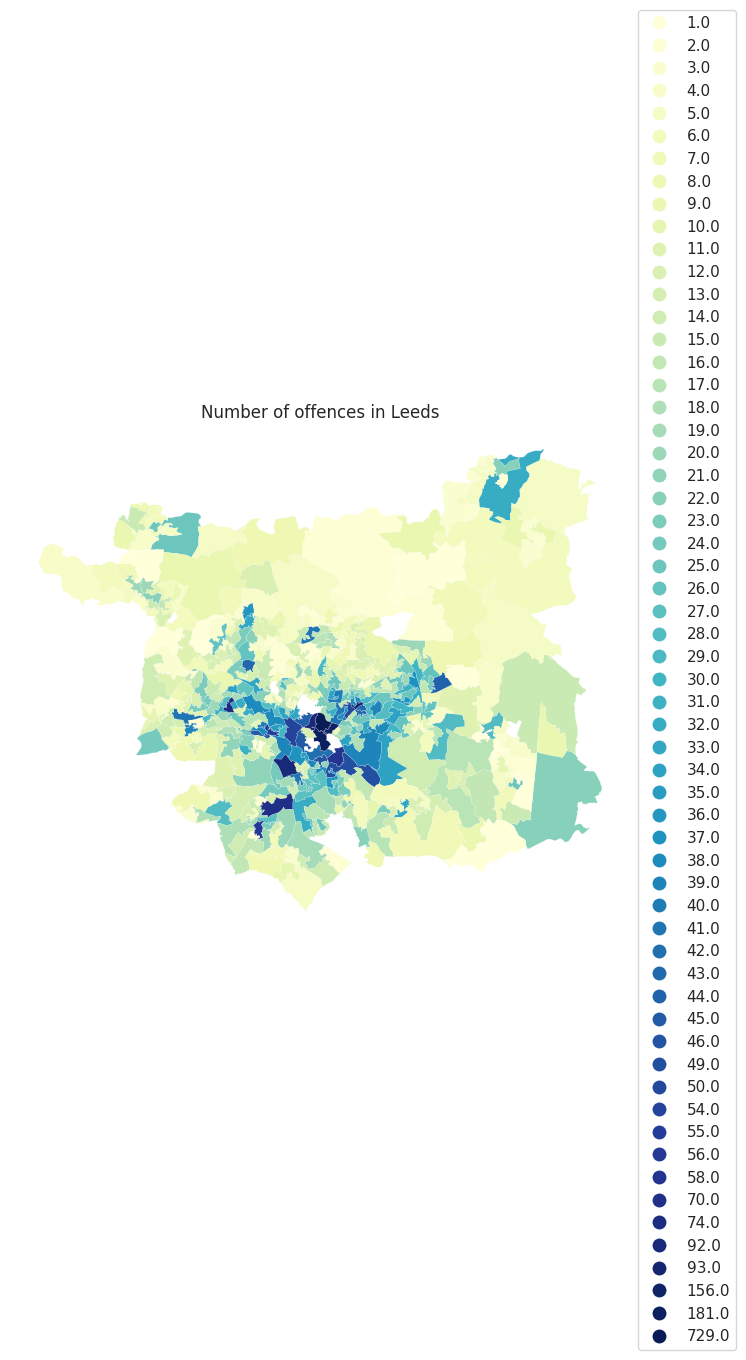

In [22]:
# join the age_crime data to the leeds_shp geodataframe using a lefthand join
leeds_ac =leeds_shp.merge(age_crime, how='left',left_on='LSOA21CD',right_on='LSOA code')
leeds_ac.columns

# create a list of the columns we want to plot
leeds_ac_cols =['proportion of youth population','number of offences']

# create a for loop for plotting a map of each domain
# this saves writing out 7 blocks of code for each visualisation

# for each item in a range from 0 to 1 (number of items in the deciles_cols list)
for i in range (0, len(leeds_ac_cols)):

    # produce a plot
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    # get the ith item in the decile column list and plot
    leeds_ac.plot(column=leeds_ac_cols[i],


    #### format the plot ###

    # reduce linewidth between polygons
    linewidth =0.1,
    # specify data is categorical (ordinal)
    categorical=True,
    # show the legend
    legend=True,
    # define the legend palette
    cmap='YlGnBu',
    # use the define axis
    ax=ax,
    # position the legend
    legend_kwds={'loc': 'center left','bbox_to_anchor':(1,0.5)})

    # add a title based on the column plotted, formatting the title to look better
    plt.title(leeds_ac_cols[i].replace('_',' ').capitalize()+' in Leeds')
    #ax[0].set_title('Proportion of youth population in Leeds')

    # give subplot 2 an informative title
    #ax[1].set_title('Number of offences in Leeds')

    # do not plot with the axis showing
    plt.axis('off')

    # save the figure as an image with name reflecting the domain plotted
    plt.savefig(str(leeds_ac_cols[i])+'_'+'Leeds'+'.jpg',bbox_inches='tight');


# The two graphs below represent the proportion of the youth population in Leeds and the number of offences in Leeds respectively. The same colour labels have been chosen for both graphs and the values are arranged in order from smallest to largest so that the spatial variation of the values can be seen at a glance. The colour scheme from light yellow to dark blue was also chosen because it varies in the brightness of the colours, making both graphs easier to interpret.

# As can be seen in the graphs, there is a significant spatial correlation between the percentage of youth population and crime rates. Specifically, areas with high youth population rates typically have higher crime rates, while areas with low youth population rates typically have lower crime rates. The proportion of youth population is a significant factor influencing local crime rates. (Mulamba, 2021).

# A map of the spatial distribution of the proportion of youth population in Leeds shows that Leeds City Centre has the highest proportion of youth population. Areas of Leeds with a low proportion of youth population are concentrated in the north of the city, with higher proportions of youth population in Leeds city centre and the west. However, there are some anomalies, for example, four areas in Leeds City Centre have a youth population proportion below 20% and one area in South Leeds has a youth population proportion as high as 50% to 60%.

# The graph of the number of crimes in Leeds shows that there are more crimes in central Leeds and fewer in north Leeds. The area with the highest number of crimes is Leeds city centre with over 700 cases. There are eight areas with lower numbers of offences. The majority of areas in Leeds had less than 100 offences, with a few areas having more than 200 offences. The spatial distribution is broadly similar to the proportion of the youth population in Leeds.

# In the future, additional variables such as the age structure of the Leeds population and the income levels of different age groups in Leeds could be included to explore the relationship between these variables and crime rates in the city. Areas with higher numbers of offences are compared with areas with lower numbers of offences to look for differences between the two.

In [20]:
# Calculate Spearman's rank correlation
leeds_ac_corr =leeds_ac[['proportion of youth population','number of offences']].corr(method = 'spearman')
leeds_ac_corr

,proportion of youth population,number of offences
proportion of youth population,1.000000,0.509949
number of offences,0.509949,1.000000


Labels: Index(['proportion of youth population', 'number of offences'], dtype='object') Index(['proportion of youth population', 'number of offences'], dtype='object')
Labels with capital letters: ['Proportion of youth population', 'Number of offences'] ['Proportion of youth population', 'Number of offences']


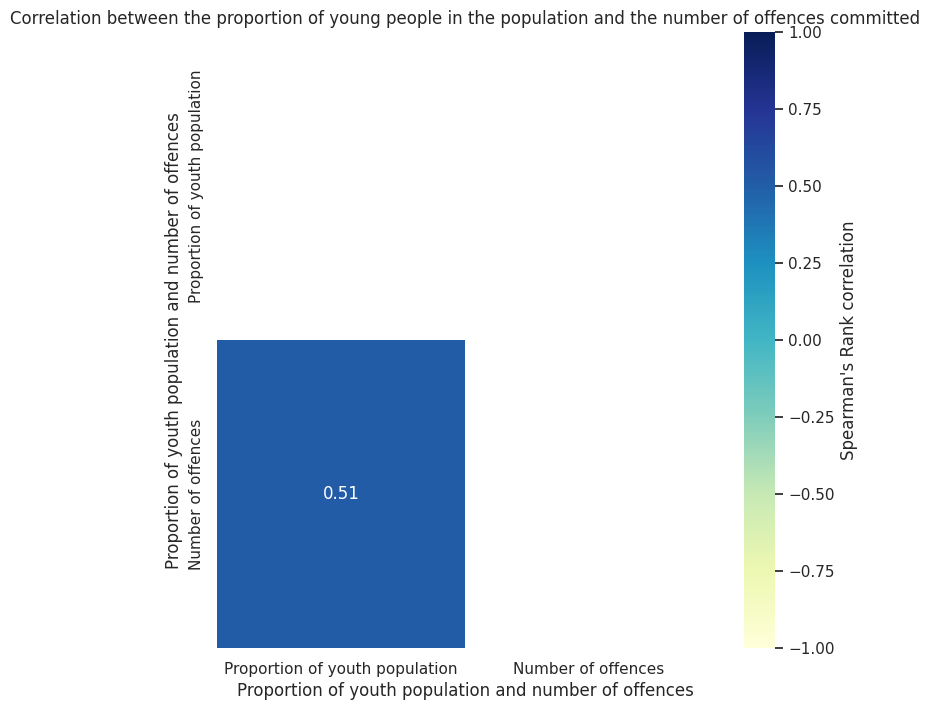

In [21]:
# Visualise the Spearman's rank correlation of the PPFI domains
# define plot size
fig,ax = plt.subplots(figsize=(8,8))

# define mask to apply to upper right hand corner of the plot
data_to_mask = np.triu(np.ones_like(leeds_ac_corr))

# define axis tick labels
# get the index and the columns, replace the underscores with spaces
x_axis_labels = leeds_ac_corr.columns.str.replace('_',' ')
y_axis_labels = leeds_ac_corr.index.str.replace('_',' ')

# Have a look at what the tick labels look like
print('Labels:',x_axis_labels ,y_axis_labels)

# If we want to capitalize each tick label
# for each element in the list of x_axis_labels, capitalize it
x_axis_labels = [element.capitalize() for element in x_axis_labels]
y_axis_labels = [element.capitalize() for element in y_axis_labels]

# look at the new labels
print('Labels with capital letters:',x_axis_labels ,y_axis_labels)


# plot a heatmap of the correlation dataframe
sns.heatmap(leeds_ac_corr,
            # annotate so spearman's rank correlation values are displayed on the squares
            annot=True,
            # define colourmap
            cmap='YlGnBu',
            # define value of minimum colour on cbar
            vmin=-1,
            # define value of maximum colour on cbar
            vmax=1,
            # add the mask
            mask=data_to_mask,
            # use the custom tick labels
            xticklabels=x_axis_labels,
            yticklabels=y_axis_labels,
            # add a label to the cbar
            cbar_kws={'label': "Spearman's Rank correlation"},
            # plot on the axis we defined
            ax=ax)

# Set axis labels
ax.set(xlabel="Proportion of youth population and number of offences",
       ylabel="Proportion of youth population and number of offences",
      title ='Correlation between the proportion of young people in the population and the number of offences committed' );
plt.savefig('Correlation_between_the_proportion_of_young_people_in_the_population_and_the_number_of_offences_committed.png')


# The topic of this assignment investigation is whether the proportion of the youth population in Leeds is related to the crime rate. There are studies that show that crime rates in England and Wales have decreased since 2005. This is largely attributed to the reduction in the youth offending population. Changes in crime rates in England and Wales are closely linked to the youth offending population. (Griffiths and Norris, 2020) Therefore, for this assignment, the age structure of Leeds and the number of offences committed in Leeds in October 2021 were selected from the 2021 Census data.

# The majority of young people are impulsive, immature and relatively susceptible to influences that can significantly contribute to or hinder socio-economic development. Areas with a high proportion of young people should therefore receive more attention. (Sandoval Garrido, 2021) The figure below explores whether there is a significant association between the proportion of young people and the crime rate, using the proportion of young people as the independent variable and the crime rate as the dependent variable (Parker, 2015).

# There are several outliers in the dataset and the aim of this study is to investigate whether there is some correlation between these two variables that contradicts the least squares method. (TARLING and DENNIS, 2016) Therefore, the Spearman rank correlation coefficient was chosen for this study and a heat map was produced. After calculating the correlation between the proportion of the youth population and the number of offences was calculated to be 0.51. This suggests that there is a correlation between the proportion of the youth population and the number of offences in Leeds and it is a positive correlation, which means that the higher the proportion of the youth population, the more likely the area will have crimes to occur.

In [ ]:
# Reference:
# Mulamba, K.C. 2021. A Spatial Analysis of Property Crime Rates in South Africa. The South African Journal of economics. 89(3), pp.329–347.
# Griffiths, G. and Norris, G. 2020. Explaining the crime drop: contributions to declining crime rates from youth cohorts since 2005. Crime, law, and social change. 73(1), pp.25–53.
# Parker, K.F. 2015. The African-American Entrepreneur–Crime Drop Relationship: Growing African-American Business Ownership and Declining Youth Violence. Urban affairs review (Thousand Oaks, Calif.). 51(6), pp.751–780.
# Sandoval Garrido, L.E. 2021. Youth crime in Colombia. Papeles de población. 26(105), pp.131–154.
# TARLING, R. and DENNIS, R. 2016. Socio-Economic Determinants of Crime Rates: Modelling Local Area Police-Recorded Crime. Howard journal of crime and justice. 55(1–2), pp.207–225.